In [43]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from sklearn import preprocessing

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

In [4]:
whale_labels = pd.read_csv('../data/train.csv')
whale_labels

,Image,whaleID
0,w_7812.jpg,whale_48813
1,w_4598.jpg,whale_09913
2,w_3828.jpg,whale_45062
3,w_8734.jpg,whale_74162
4,w_3251.jpg,whale_99558
5,w_8063.jpg,whale_59255
6,w_5624.jpg,whale_87291
7,w_825.jpg,whale_33152
8,w_3974.jpg,whale_88147
9,w_3049.jpg,whale_77693


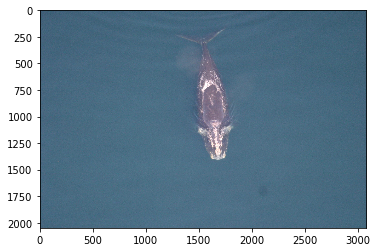

In [17]:
# Show first image and its class
img_name = whale_labels.ix[0, 0]
whale_id = whale_labels.ix[0, 1]
def show_whales_img(image, whale_id):
    """Show image with landmarks"""
    plt.imshow(image)
#     print(whale_id)

plt.figure()
show_whales_img(io.imread(os.path.join('../data/imgs/', img_name)),
               whale_id)
plt.show()

In [49]:
class WhaleDataset(Dataset):
    """Whale dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        label_data = pd.read_csv(csv_file)
        label_encoder = preprocessing.LabelEncoder()
        label_data['label'] = label_encoder.fit_transform(label_data['whaleID'])
        self.img_lookup = label_data
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.img_lookup)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.img_lookup.ix[idx, 0])
        image = io.imread(img_name)
        whale_id = self.img_lookup.ix[idx, 2]
        sample = {'image': image, 'whale_id': whale_id}

        if self.transform:
            sample = self.transform(sample)

        return sample

In [46]:
label_data = pd.read_csv('../data/train.csv')
label_encoder = preprocessing.LabelEncoder()
label_data['label'] = label_encoder.fit_transform(label_data['whaleID'])


In [47]:
label_data

,Image,whaleID,label
0,w_7812.jpg,whale_48813,222
1,w_4598.jpg,whale_09913,44
2,w_3828.jpg,whale_45062,203
3,w_8734.jpg,whale_74162,329
4,w_3251.jpg,whale_99558,445
5,w_8063.jpg,whale_59255,266
6,w_5624.jpg,whale_87291,391
7,w_825.jpg,whale_33152,143
8,w_3974.jpg,whale_88147,396
9,w_3049.jpg,whale_77693,344


0 (2048, 3072, 3) whale_48813
1 (2048, 3072, 3) whale_09913
2 (2048, 3072, 3) whale_45062
3 (2048, 3072, 3) whale_74162


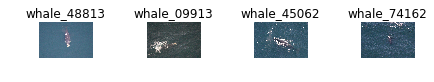

In [22]:
whale_dataset = WhaleDataset(csv_file='../data/train.csv',
                            root_dir='../data/imgs')

fig = plt.figure()

for i in range(len(whale_dataset)):
    sample = whale_dataset[i]

    print(i, sample['image'].shape, sample['whale_id'])

    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title(sample['whale_id'])
    ax.axis('off')
    show_whales_img(**sample)

    if i == 3:
        plt.show()
        break

In [57]:
whale_dataset = WhaleDataset(csv_file='../data/train.csv',
                            root_dir='../data/imgs')
df = whale_dataset.img_lookup
df['label'].max(axis=0)
# df

446

In [25]:
class Rescale(object):
    """Rescale the image in a sample to a given size.

    Args:
        output_size (tuple or tuple): Desired output size. If tuple, output is
            matched to output_size. If int, smaller of image edges is matched
            to output_size keeping aspect ratio the same.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        self.output_size = output_size

    def __call__(self, sample):
        image, whale_id = sample['image'], sample['whale_id']

        h, w = image.shape[:2]
        if isinstance(self.output_size, int):
            if h > w:
                new_h, new_w = self.output_size * h / w, self.output_size
            else:
                new_h, new_w = self.output_size, self.output_size * w / h
        else:
            new_h, new_w = self.output_size

        new_h, new_w = int(new_h), int(new_w)

        img = transform.resize(image, (new_h, new_w))

        # h and w are swapped for landmarks because for images,
        # x and y axes are axis 1 and 0 respectively
#         landmarks = landmarks * [new_w / w, new_h / h]

        return {'image': img, 'whale_id': whale_id}


class RandomCrop(object):
    """Crop randomly the image in a sample.

    Args:
        output_size (tuple or int): Desired output size. If int, square crop
            is made.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        if isinstance(output_size, int):
            self.output_size = (output_size, output_size)
        else:
            assert len(output_size) == 2
            self.output_size = output_size

    def __call__(self, sample):
        image, whale_id = sample['image'], sample['whale_id']

        h, w = image.shape[:2]
        new_h, new_w = self.output_size

        top = np.random.randint(0, h - new_h)
        left = np.random.randint(0, w - new_w)

        image = image[top: top + new_h,
                      left: left + new_w]

#         landmarks = landmarks - [left, top]

        return {'image': image, 'whale_id': whale_id}


class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        image, whale_id = sample['image'], sample['whale_id']

        # swap color axis because
        # numpy image: H x W x C
        # torch image: C X H X W
        image = image.transpose((2, 0, 1))
        return {'image': torch.from_numpy(image),
                'whale_id': whale_id}

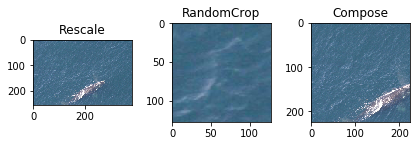

In [28]:
scale = Rescale(256)
crop = RandomCrop(128)
composed = transforms.Compose([Rescale(256),
                              RandomCrop(224)])

# Apply each of the above transforms on sample.
fig = plt.figure()
sample = whale_dataset[60]
for i, tsfrm in enumerate([scale, crop, composed]):
    transformed_sample = tsfrm(sample)

    ax = plt.subplot(1, 3, i + 1)
    plt.tight_layout()
    ax.set_title(type(tsfrm).__name__)
    show_whales_img(**transformed_sample)

plt.show()

In [31]:
transformed_dataset = WhaleDataset(csv_file='../data/train.csv',
                                           root_dir='../data/imgs',
                                           transform=transforms.Compose([
                                               Rescale(256),
                                               ToTensor()
                                           ]))

for i in range(len(transformed_dataset)):
    sample = transformed_dataset[i]

    print(i, sample['image'].size(), sample['whale_id'])

    if i == 3:
        break

0 torch.Size([3, 256, 384]) whale_48813
1 torch.Size([3, 256, 384]) whale_09913
2 torch.Size([3, 256, 384]) whale_45062
3 torch.Size([3, 256, 384]) whale_74162


0 torch.Size([4, 3, 256, 384]) 4
1 torch.Size([4, 3, 256, 384]) 4
2 torch.Size([4, 3, 256, 384]) 4
3 torch.Size([4, 3, 256, 384]) 4


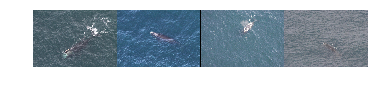

In [37]:
dataloader = DataLoader(transformed_dataset, batch_size=4,
                        shuffle=True, num_workers=4)


# Helper function to show a batch
def show_img_batch(sample_batched):
    """Show image with landmarks for a batch of samples."""
    images_batch, whaleId_batch = \
            sample_batched['image'], sample_batched['whale_id']
    batch_size = len(images_batch)
    im_size = images_batch.size(2)

    grid = utils.make_grid(images_batch)
    plt.imshow(grid.numpy().transpose((1, 2, 0)))

for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch, sample_batched['image'].size(),
          len(sample_batched['whale_id']))

    # observe 4th batch and stop.
    if i_batch == 3:
        plt.figure()
        show_img_batch(sample_batched)
        plt.axis('off')
        plt.ioff()
        plt.show()
        break

In [38]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6,
                               kernel_size=3, stride=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, 
                               kernel_size=5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [39]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [40]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(dataloader, 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data[0]
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

RuntimeError: Variable data has to be a tensor, but got str